# WCP: OxCGRT cleaning

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
    - ['Fullwithnotes' datasets](#fullwithnotes_datasets)
    - [Compact datasets](#compact_datasets)
    - [Simplified datasets](#simplified_datasets)
- [Datasets cleaning](#datasets_cleaning)
    - ['Fullwithnotes'](#fullwithnotes_cleaning)
    - [Compact](#compact_cleaning)
    - [Simplified](#simplified_cleaning)
- [Data exporting](#data_exporting)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
This notebook assesses datasets in the <a href="https://github.com/OxCGRT/covid-policy-dataset/tree/main" target="_blank">OxCGRT Github repository</a>, and cleans them in preparation for exploratory analysis and modelling in other notebooks. The OxCGRT data is some of the most reliably sourced and published information on the actions of governments around the world during the pandemic. Hence its value in research into pandemic policy. 
    
The datasets are cleaned and used in the following steps, undertaken as the analysis develops:
    
1) The OxCGRT 'simplified' datasets are quickly cleaned and made available for investigation. This step is a test of the utility of such data for policy analysis, and a way of showing what might be possible. The research undertaken is shown in a forthcoming notebook. 
    
2) Following exploration and analysis of the simplified datasets, the other much more extensive OxCGRT datasets will be used in expanded research.  
   
</div>

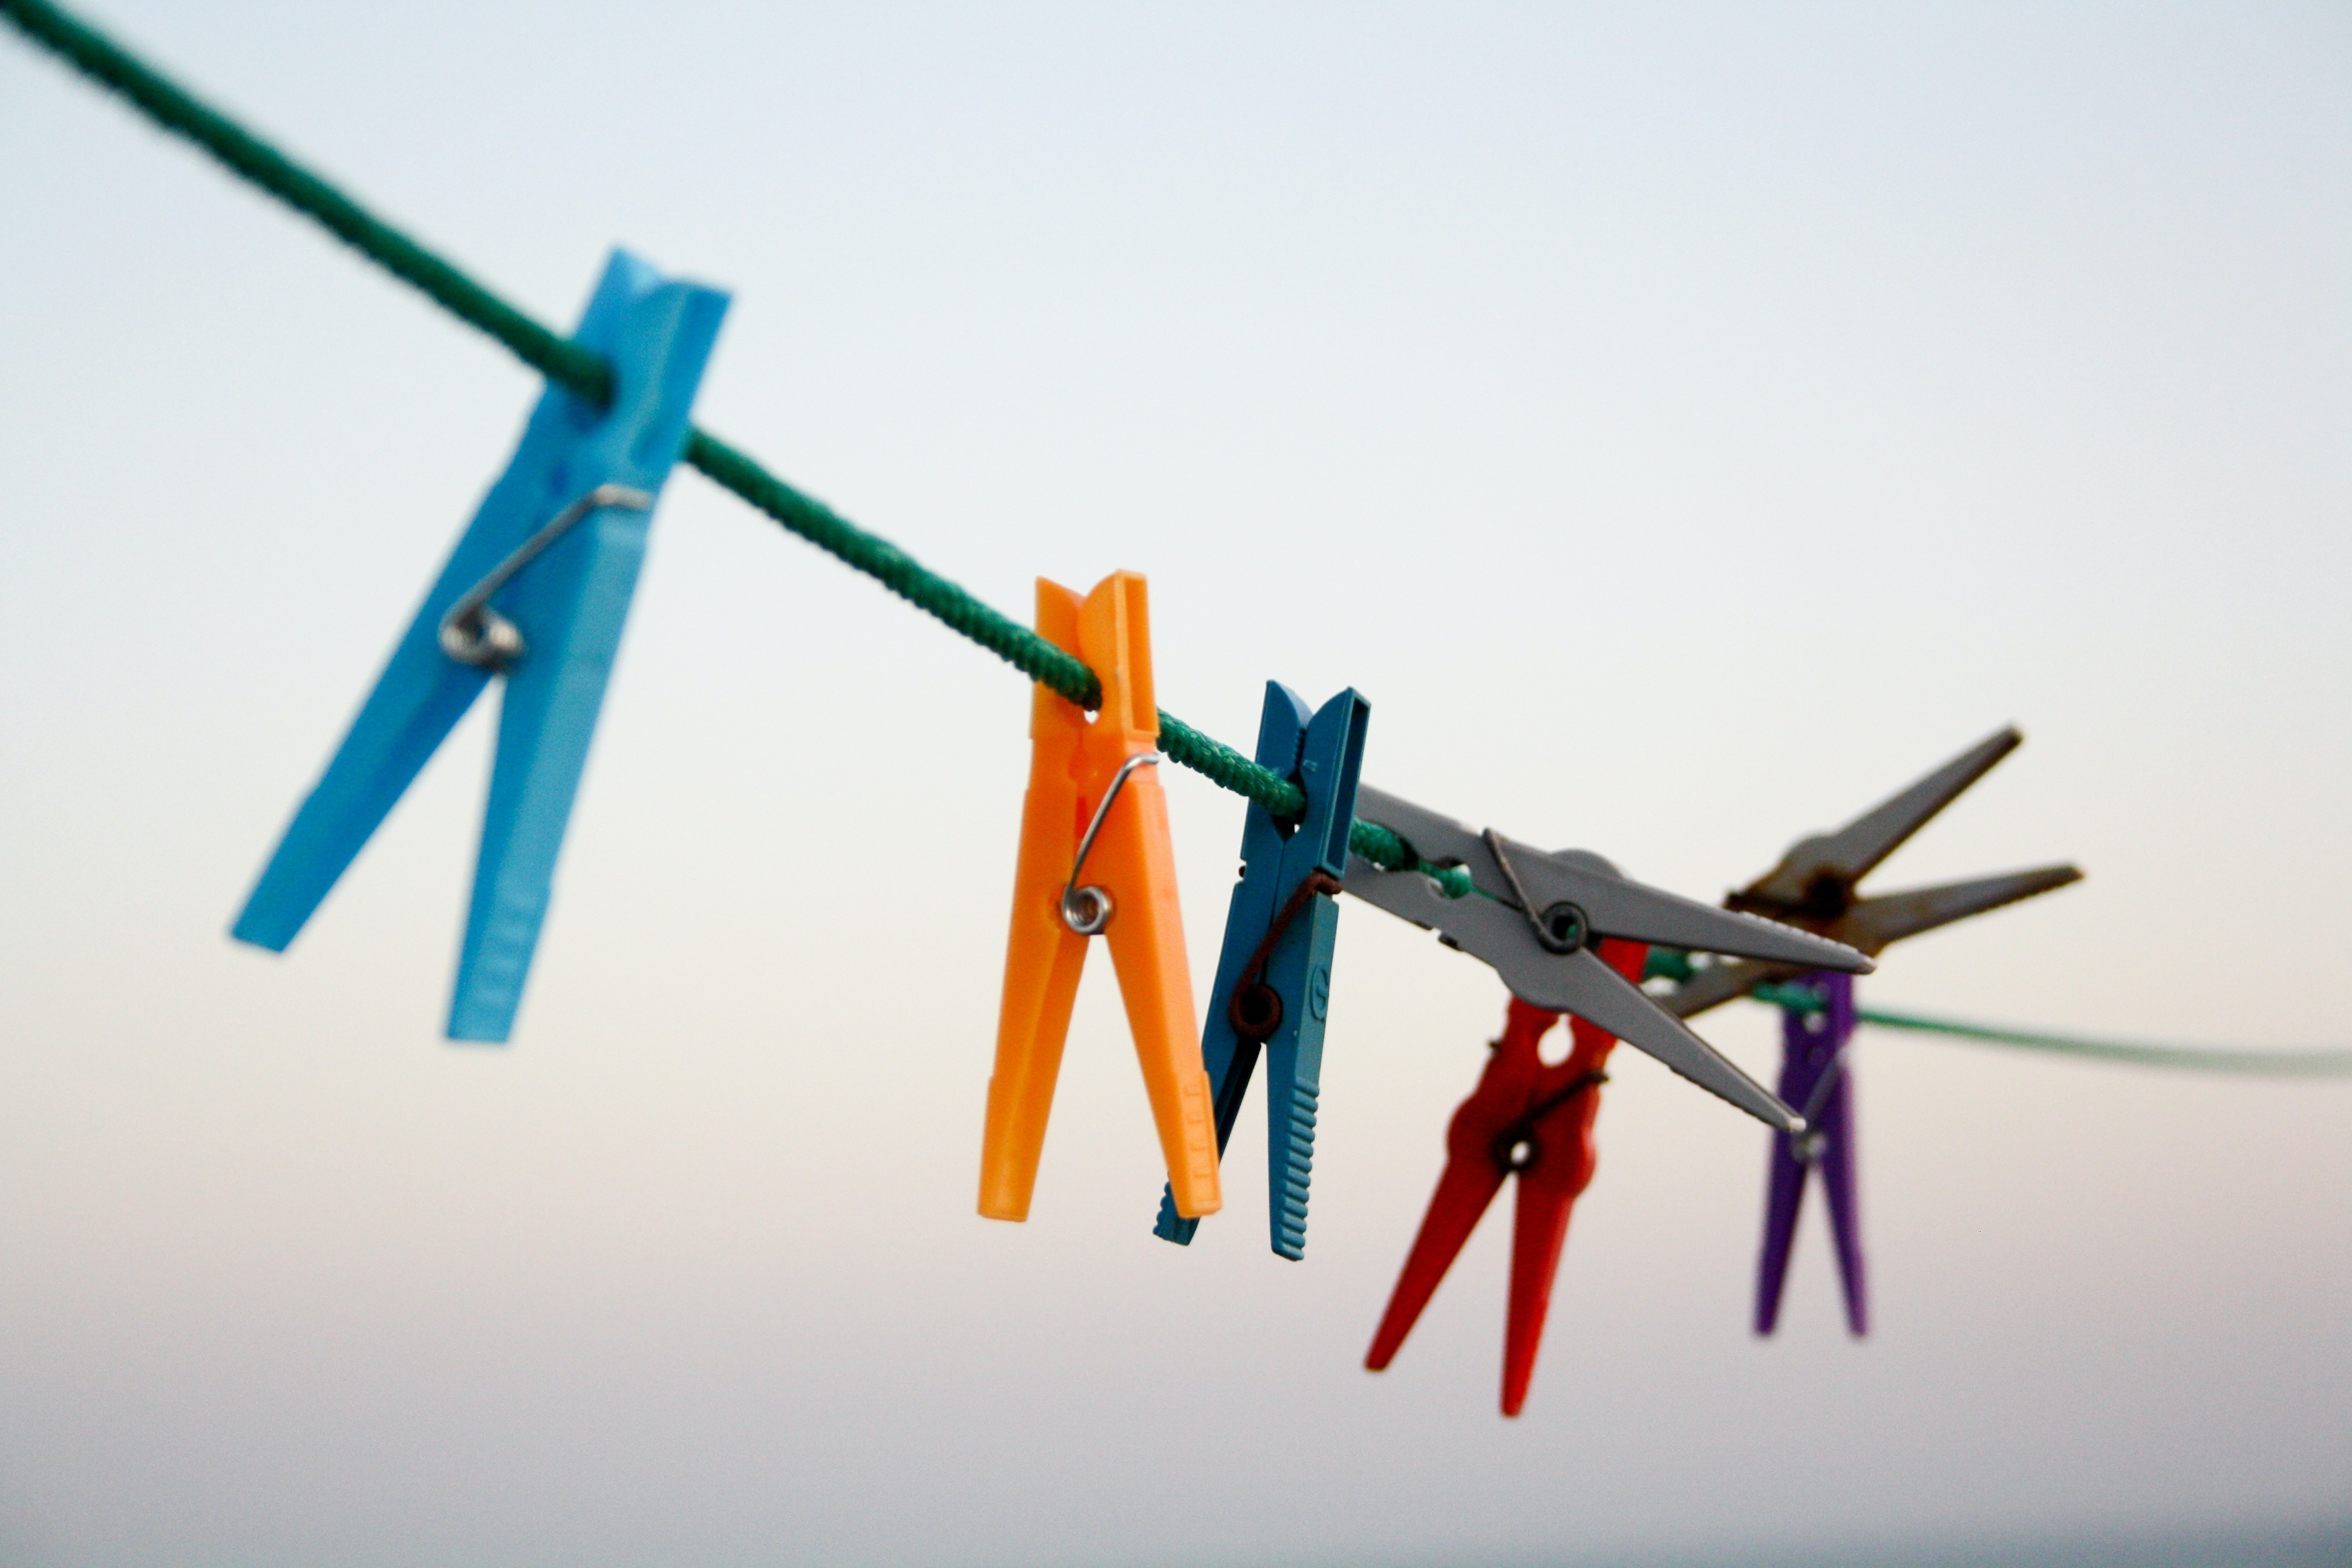

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [241]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports date and time packages for dealing with such
import datetime

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions and settings that are used in the notebook.
</div>

In [242]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [243]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
Showing, importing and initially investigating datasets from OxCGRT. 
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
The <a href="https://github.com/OxCGRT/covid-policy-dataset/tree/main" target="_blank">OxCGRT Github repository</a> holds seven types of dataset: 
    
- 'Compact', which according to OxCGRT '...contains 56 variables (including metadata) for 185 national jurisdictions and 210 subnational jurisdictions.'
    
- 'Simplified', which according to OxCGRT '...contains just a single variable for each indicator and a single version of each index. In total...contains 50 variables for 185 national jurisdictions and 170 subnational jurisdictions.'
    
- 'fullwithnotes', which according to OxCGRT '...provide[s] maximum detail while still reporting the overall situation in each jurisdiction. All jurisdictions in these files contain the TOTAL designation, meaning they report the overall total policy environment on residents.These files are structured across 147 variables (including metadata).'
    
- 'raw', which according to OxCGRT include '...provide the raw data...collected for subnational jurisdictions. These jurisdictions are generally designated as WIDE or GOV, meaning they report the policies set by a certain level of government (residents may also be subject to policies from other levels of government). These files are structured across 128 variables (including metadata).'
    
- 'vaccines_full', which according to OxCGRT '...contain...raw data for the vaccine indicators V1-V4 over 226 variables (where each of the 4 indicators has a separate variable recording the policy for each of the 52 population categories).'
    
- 'timeseries', which according to OxCGRT are 'The four policy indices...also published in timeseries format, which uses the “average” version of each index from the OxCGRT_compact files.'
 
There are also files available on regions of countries for which the data collection was onlyt partially completed. 

The compact, simplified, and 'fullwithnotes' files are all looked at briefly below. As explained in the introduction, as of September 2023 the simplified data is taken forward for exploration and analysis. The other datasets will be used as the research develops. 
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

#### 'Fullwithnotes' datasets
<a id='fullwithnotes_datasets'></a>

In [244]:
# Imports the dataset
oxcgrt__full_2022 = pd.read_csv('~/css/projects/wcp/data/OxCGRT_fullwithnotes_national_2022_v1.csv', on_bad_lines='skip', low_memory=False)

In [245]:
# Shows the top of the dataset
oxcgrt__full_2022.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,StringencyIndex_WeightedAverage,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20220101,1.0,1.0,NaN,NaN,...,34.26,40.1,40.1,40.1,40.1,42.26,42.26,42.26,42.26,25.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20220102,1.0,1.0,NaN,NaN,...,34.26,40.1,40.1,40.1,40.1,42.26,42.26,42.26,42.26,25.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20220103,1.0,1.0,NaN,NaN,...,34.26,40.1,40.1,40.1,40.1,42.26,42.26,42.26,42.26,25.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20220104,1.0,1.0,NaN,NaN,...,34.26,40.1,40.1,40.1,40.1,42.26,42.26,42.26,42.26,25.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20220105,1.0,1.0,NaN,NaN,...,34.26,40.1,40.1,40.1,40.1,42.26,42.26,42.26,42.26,25.0


In [246]:
# Shows the top of the dataset
oxcgrt__full_2022.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,StringencyIndex_WeightedAverage,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex
67520,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221227,1.0,1.0,NaN,NaN,...,29.48,37.5,33.85,35.67,36.44,42.86,38.69,40.78,41.65,0.0
67521,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221228,1.0,1.0,NaN,NaN,...,29.48,37.5,33.85,35.67,36.44,42.86,38.69,40.78,41.65,0.0
67522,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221229,1.0,1.0,NaN,NaN,...,29.48,37.5,33.85,35.67,36.44,42.86,38.69,40.78,41.65,0.0
67523,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221230,1.0,1.0,NaN,NaN,...,29.48,37.5,33.85,35.67,36.44,42.86,38.69,40.78,41.65,0.0
67524,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221231,1.0,1.0,NaN,NaN,...,29.48,37.5,33.85,35.67,36.44,42.86,38.69,40.78,41.65,0.0


<div class="alert-info">
We've succesfully imported the dataset. Now let's run some checks on it. 
</div>

In [247]:
# Runs EDA checks on the dataset using the respective function
EDA_checks(oxcgrt__full_2022)

ROW LABELS

RangeIndex(start=0, stop=67525, step=1)

COLUMN NAMES

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1E_School closing', 'C1E_Flag',
       'C1NV_School closing', 'C1NV_Flag',
       ...
       'StringencyIndex_WeightedAverage',
       'GovernmentResponseIndex_NonVaccinated',
       'GovernmentResponseIndex_Vaccinated',
       'GovernmentResponseIndex_SimpleAverage',
       'GovernmentResponseIndex_WeightedAverage',
       'ContainmentHealthIndex_NonVaccinated',
       'ContainmentHealthIndex_Vaccinated',
       'ContainmentHealthIndex_SimpleAverage',
       'ContainmentHealthIndex_WeightedAverage', 'EconomicSupportIndex'],
      dtype='object', length=147)

NUMBER OF ROWS AND COLUMNS

(67525, 147)

CONCISE SUMMARY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67525 entries, 0 to 67524
Columns: 147 entries, CountryName to EconomicSupportIndex
dtypes: float64(115), int64(4), object(28)
memory usage: 75.7+ MB
None

DESC

       CountryName CountryCode  RegionName  RegionCode Jurisdiction  \
count        67525       67525         0.0         0.0        67525   
unique         185         185         NaN         NaN            1   
top          Aruba         ABW         NaN         NaN    NAT_TOTAL   
freq           365         365         NaN         NaN        67525   
mean           NaN         NaN         NaN         NaN          NaN   
std            NaN         NaN         NaN         NaN          NaN   
min            NaN         NaN         NaN         NaN          NaN   
25%            NaN         NaN         NaN         NaN          NaN   
50%            NaN         NaN         NaN         NaN          NaN   
75%            NaN         NaN         NaN         NaN          NaN   
max            NaN         NaN         NaN         NaN          NaN   

                Date  C1E_School closing      C1E_Flag  C1NV_School closing  \
count   6.752500e+04        64127.000000  21747.000000          3398

In [248]:
# Looks for missing and duplicated rows, columns and cells
missing_and_duplicated(oxcgrt__full_2022)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,StringencyIndex_WeightedAverage,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex


NULLS

There are 5228231 null values in the dataset.

The null values are in the following columns:


CountryName                                   0
CountryCode                                   0
RegionName                                67525
RegionCode                                67525
Jurisdiction                                  0
                                          ...  
ContainmentHealthIndex_NonVaccinated          0
ContainmentHealthIndex_Vaccinated             0
ContainmentHealthIndex_SimpleAverage          0
ContainmentHealthIndex_WeightedAverage      730
EconomicSupportIndex                          0
Length: 147, dtype: int64


The null values above account for the following percentages of all null values:


CountryName                                 0.000000
CountryCode                                 0.000000
RegionName                                100.000000
RegionCode                                100.000000
Jurisdiction                                0.000000
                                             ...    
ContainmentHealthIndex_NonVaccinated        0.000000
ContainmentHealthIndex_Vaccinated           0.000000
ContainmentHealthIndex_SimpleAverage        0.000000
ContainmentHealthIndex_WeightedAverage      1.081081
EconomicSupportIndex                        0.000000
Length: 147, dtype: float64

<div class="alert-info">
As expected, the dataset is rich with policy variables. But it will require too much careful cleaning for initial research scoping. Let's move to the compact datasets. 
</div>

#### Compact datasets
<a id='compact_datasets'></a>

In [249]:
# Imports the dataset
oxcgrt_compact = pd.read_csv('~/css/projects/wcp/data/OxCGRT_compact_national_v1.csv', on_bad_lines='skip', low_memory=False)

In [250]:
# Shows the top of the dataset
oxcgrt_compact.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [251]:
# Shows the bottom of the dataset
oxcgrt_compact.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
202755,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221227,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202756,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221228,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202757,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221229,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202758,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221230,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202759,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221231,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0


<div class="alert-info">
We've succesfully imported the dataset. Now let's run some checks on it. 
</div>

In [252]:
# Runs EDA checks on the dataset using the respective function
EDA_checks(oxcgrt_compact)

ROW LABELS

RangeIndex(start=0, stop=202760, step=1)

COLUMN NAMES

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_School closing', 'C1M_Flag',
       'C2M_Workplace closing', 'C2M_Flag', 'C3M_Cancel public events',
       'C3M_Flag', 'C4M_Restrictions on gatherings', 'C4M_Flag',
       'C5M_Close public transport', 'C5M_Flag',
       'C6M_Stay at home requirements', 'C6M_Flag',
       'C7M_Restrictions on internal movement', 'C7M_Flag',
       'C8EV_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag',
       'V1_Vaccine Prioritisa

       CountryName CountryCode  RegionName  RegionCode Jurisdiction  \
count       202760      202760         0.0         0.0       202760   
unique         185         185         NaN         NaN            1   
top          Aruba         ABW         NaN         NaN    NAT_TOTAL   
freq          1096        1096         NaN         NaN       202760   
mean           NaN         NaN         NaN         NaN          NaN   
std            NaN         NaN         NaN         NaN          NaN   
min            NaN         NaN         NaN         NaN          NaN   
25%            NaN         NaN         NaN         NaN          NaN   
50%            NaN         NaN         NaN         NaN          NaN   
75%            NaN         NaN         NaN         NaN          NaN   
max            NaN         NaN         NaN         NaN          NaN   

                Date  C1M_School closing       C1M_Flag  \
count   2.027600e+05       202760.000000  128263.000000   
unique           NaN         

In [253]:
# Looks for missing and duplicated rows, columns and cells
missing_and_duplicated(oxcgrt_compact)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex


NULLS

There are 2266645 null values in the dataset.

The null values are in the following columns:


CountryName                                                                             0
CountryCode                                                                             0
RegionName                                                                         202760
RegionCode                                                                         202760
Jurisdiction                                                                            0
Date                                                                                    0
C1M_School closing                                                                      0
C1M_Flag                                                                            74497
C2M_Workplace closing                                                                   0
C2M_Flag                                                                            68936
C3M_Cancel public events                                                                0
C3M_Flag  


The null values above account for the following percentages of all null values:


CountryName                                                                          0.000000
CountryCode                                                                          0.000000
RegionName                                                                         100.000000
RegionCode                                                                         100.000000
Jurisdiction                                                                         0.000000
Date                                                                                 0.000000
C1M_School closing                                                                   0.000000
C1M_Flag                                                                            36.741468
C2M_Workplace closing                                                                0.000000
C2M_Flag                                                                            33.998816
C3M_Cancel public events                                    

<div class="alert-info">
Like the most detailed datasets, the compact one will still require too much cleaning for initial analysis. The simplified data is likely the better bet. Let's move to that.      
</div>

#### Simplified datasets
<a id='simplified_datasets'></a>

In [254]:
# Imports the dataset
oxcgrt_simplified = pd.read_csv('~/css/projects/wcp/data/OxCGRT_simplified_v1.csv', on_bad_lines='skip', low_memory=False)

In [255]:
# Shows the top of the dataset
oxcgrt_simplified.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0


In [256]:
# Shows the bottom of the dataset
oxcgrt_simplified.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
390904,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221227,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
390905,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221228,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
390906,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221229,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
390907,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221230,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
390908,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221231,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0


<div class="alert-info">
We've succesfully imported the dataset. Now let's run some checks on it. 
</div>

In [257]:
# Runs EDA checks on the dataset using the respective function
EDA_checks(oxcgrt_simplified)

ROW LABELS

RangeIndex(start=0, stop=390909, step=1)

COLUMN NAMES

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_combined_numeric', 'C1M_combined',
       'C2M_combined_numeric', 'C2M_combined', 'C3M_combined_numeric',
       'C3M_combined', 'C4M_combined_numeric', 'C4M_combined',
       'C5M_combined_numeric', 'C5M_combined', 'C6M_combined_numeric',
       'C6M_combined', 'C7M_combined_numeric', 'C7M_combined',
       'C8EV_combined_numeric', 'C8EV_combined', 'E1_combined_numeric',
       'E1_combined', 'E2_combined_numeric', 'E2_combined',
       'H1_combined_numeric', 'H1_combined', 'H2_combined_numeric',
       'H2_combined', 'H3_combined_numeric', 'H3_combined',
       'H6M_combined_numeric', 'H6M_combined', 'H7_combined_numeric',
       'H7_combined', 'H8M_combined_numeric', 'H8M_combined', 'V1..summary.',
       'V2..summary.', 'V3..summary.', 'V4..summary.', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated',

          CountryName CountryCode RegionName RegionCode Jurisdiction  \
count          390909      390909     188149     188149       390909   
unique            185         185        170        170            2   
top     United States         USA  Chongqing     CHN_CQ    NAT_TOTAL   
freq            56992       56992       1155       1155       202760   
mean              NaN         NaN        NaN        NaN          NaN   
std               NaN         NaN        NaN        NaN          NaN   
min               NaN         NaN        NaN        NaN          NaN   
25%               NaN         NaN        NaN        NaN          NaN   
50%               NaN         NaN        NaN        NaN          NaN   
75%               NaN         NaN        NaN        NaN          NaN   
max               NaN         NaN        NaN        NaN          NaN   

                Date  C1M_combined_numeric C1M_combined  C2M_combined_numeric  \
count   3.909090e+05         390909.000000       39090

In [258]:
# Looks for missing and duplicated rows, columns and cells
missing_and_duplicated(oxcgrt_simplified)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex


NULLS

There are 599902 null values in the dataset.

The null values are in the following columns:


CountryName                             0
CountryCode                             0
RegionName                         202760
RegionCode                         202760
Jurisdiction                            0
Date                                    0
C1M_combined_numeric                    0
C1M_combined                            0
C2M_combined_numeric                    0
C2M_combined                            0
C3M_combined_numeric                    0
C3M_combined                            0
C4M_combined_numeric                    0
C4M_combined                            0
C5M_combined_numeric                    0
C5M_combined                            0
C6M_combined_numeric                    0
C6M_combined                            0
C7M_combined_numeric                    0
C7M_combined                            0
C8EV_combined_numeric                   0
C8EV_combined                           0
E1_combined_numeric                     0
E1_combined                       


The null values above account for the following percentages of all null values:


CountryName                         0.000000
CountryCode                         0.000000
RegionName                         51.868849
RegionCode                         51.868849
Jurisdiction                        0.000000
Date                                0.000000
C1M_combined_numeric                0.000000
C1M_combined                        0.000000
C2M_combined_numeric                0.000000
C2M_combined                        0.000000
C3M_combined_numeric                0.000000
C3M_combined                        0.000000
C4M_combined_numeric                0.000000
C4M_combined                        0.000000
C5M_combined_numeric                0.000000
C5M_combined                        0.000000
C6M_combined_numeric                0.000000
C6M_combined                        0.000000
C7M_combined_numeric                0.000000
C7M_combined                        0.000000
C8EV_combined_numeric               0.000000
C8EV_combined                       0.000000
E1_combine

<div class="alert-info">
The simplified dataset looks like it will be a lot easier to work on for the moment. It has fewer policy variables, lowering computation costs, and there are many fewer missing values that will be hard to deal with. For example, in the full dataset, many of the 'missing' policy entries may be for countries that did not have the capacity to enact the select intervention. Judging each variable will take a lot of time. The simplified data will help us to more quickly gauge what's viable and interesting in the research. 
</div>

## Datasets cleaning
<a id='datasets_cleaning'></a>

#### 'Fullwithnotes'
<a id='fullwithnotes_cleaning'></a>

<div class="alert-info">
To be undertaken for later analysis. 
</div>

#### Compact
<a id='compact_cleaning'></a>

<div class="alert-info">
To be undertaken for later analysis. 
</div>

#### Simplified 
<a id='simplified_cleaning'></a>

<div class="alert-info">
Let's get into cleaning the simplest of the datasets first, starting with missing values. 
    
<br>    
    
We might not need the regional specifications - which have a lot of the missing entries - as they hold more detail than we initially need. But let's investigate the RegionName and RegionCode columns first. 
</div>

In [259]:
# Shows the unique entries in the column
oxcgrt_simplified['RegionName'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Acre', 'Alagoas', 'Amazonas',
       'Amapa', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo',
       'Goias', 'Maranhao', 'Minas Gerais', 'Mato Grosso do Sul',
       'Mato Grosso', 'Para', 'Paraiba', 'Pernambuco', 'Piaui', 'Parana',
       'Rio de Janeiro', 'Rio Grande do Norte', 'Rondonia', 'Roraima',
       'Rio Grande do Sul', 'Santa Catarina', 'Sergipe', 'Sao Paulo',
       'Tocantins', 'Alberta', 'British Columbia', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Northwest Territories', 'Nunavut', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Guangdong', 'Gansu', 'Guangxi',
       'Guizhou', 'Henan', 'Hubei', 'Hebei', 'Hainan', 'Heilongjiang',
       'Hunan', 'Jilin', 'Jiangsu'

<div class="alert-info">
The regional names conform with the OxCGRT guidance. They for Australia, Brazil, China, India, Brazil, the United Kingdom, and the United States. 
    
<br>
    
But how to find out whether these regional entries are easily distinguishable from the national ones? Let's have a go. 
</div>

In [260]:
# Gets the types of entries in the jurisdiction column
oxcgrt_simplified['Jurisdiction'].unique()

array(['NAT_TOTAL', 'STATE_TOTAL'], dtype=object)

In [261]:
# Gets a sample of entries where the jurisdiction is related to a state-level count
oxcgrt_simplified[oxcgrt_simplified['Jurisdiction'] == 'STATE_TOTAL'].sample(50)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
34761,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,20220224,2.0,2G,2.0,2G,...,5,1.0,119112.0,1968.0,V,55.58,45.37,37.40,42.74,0.0
209879,India,IND,Telangana,IND_TG,STATE_TOTAL,20220625,0.0,0,0.0,0,...,5,0.0,798621.0,4111.0,NaN,Over 50%,13.89,31.25,32.14,25.0
41494,Brazil,BRA,Distrito Federal,BR_DF,STATE_TOTAL,20220731,0.0,0,1.0,1G,...,5,0.0,830565.0,11819.0,V,79.02,17.59,27.08,27.38,25.0
71241,Canada,CAN,British Columbia,CAN_BC,STATE_TOTAL,20200102,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
364524,United States,USA,Ohio,US_OH,STATE_TOTAL,20221012,0.0,0,0.0,0,...,5,0.0,3153743.0,40251.0,V,59.68,25.04,39.61,38.12,50.0
369196,United States,USA,South Carolina,US_SC,STATE_TOTAL,20200726,3.0,3G,1.0,1G,...,0,0.0,81199.0,1491.0,NV,0,49.07,55.99,55.06,62.5
100896,China,CHN,Hainan,CHN_HI,STATE_TOTAL,20210526,1.0,1G,1.0,1G,...,5,0.0,188.0,6.0,NaN,Under 50%,32.41,42.19,48.21,0.0
327957,United States,USA,Arkansas,US_AR,STATE_TOTAL,20210908,0.5,1T,0.0,0,...,5,0.0,467496.0,7142.0,NV,42.92,30.02,42.15,44.60,25.0
215127,India,IND,West Bengal,IND_WB,STATE_TOTAL,20211105,3.0,3G,2.0,2G,...,5,0.0,1597095.0,19201.0,NaN,Under 50%,69.44,69.27,72.02,50.0
346817,United States,USA,Massachusetts,US_MA,STATE_TOTAL,20220424,0.5,1T,0.0,0,...,5,1.0,1738231.0,20222.0,V,78.79,19.47,38.56,38.71,37.5


In [262]:
# Gets a sample of entries where the jurisdiction is related to a state-level count
oxcgrt_simplified[oxcgrt_simplified['Jurisdiction'] == 'NAT_TOTAL'].sample(50)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
225900,Japan,JPN,NaN,NaN,NAT_TOTAL,20210502,1.0,1G,1.5,2T,...,5,NaN,604644.0,10387.0,NV,0.84,49.07,56.67,50.48,100.0
150479,Fiji,FJI,NaN,NaN,NAT_TOTAL,20211121,3.0,3G,1.0,1G,...,5,1.0,52453.0,695.0,V,61.98,88.26,82.46,83.53,75.0
300940,Suriname,SUR,NaN,NaN,NAT_TOTAL,20220926,1.0,1G,1.0,1G,...,5,0.0,81099.0,1385.0,NV,38.49,21.30,26.56,30.36,0.0
292884,Solomon Islands,SLB,NaN,NaN,NAT_TOTAL,20210907,0.0,0,0.0,0,...,5,NaN,20.0,0.0,NV,2.43,38.89,35.94,41.07,0.0
2812,Angola,AGO,NaN,NaN,NAT_TOTAL,20210912,0.0,0,2.0,2G,...,5,0.0,50446.0,1339.0,NV,2.69,63.89,56.77,64.88,0.0
222973,Italy,ITA,NaN,NaN,NAT_TOTAL,20220428,1.0,1G,1.0,1G,...,5,1.0,16349788.0,163244.0,V,81.09,36.44,54.87,55.57,50.0
318254,Turkey,TUR,NaN,NaN,NAT_TOTAL,20220216,1.0,1G,0.0,0,...,5,1.0,13173859.0,91388.0,V,61.72,36.62,35.18,40.21,0.0
241115,Lesotho,LSO,NaN,NaN,NAT_TOTAL,20201224,1.0,1G,1.0,1G,...,0,NaN,2725.0,51.0,NV,0,36.11,33.85,38.69,0.0
245274,Macao,MAC,NaN,NaN,NAT_TOTAL,20200513,2.0,2G,0.0,0,...,0,NaN,45.0,0.0,NV,0,37.96,48.44,44.64,75.0
316170,Trinidad and Tobago,TTO,NaN,NaN,NAT_TOTAL,20220604,0.0,0,0.0,0,...,5,0.0,162756.0,3932.0,NV,46.55,13.89,23.96,27.38,0.0


In [263]:
# Gets all of the entries for India
oxcgrt_simplified[oxcgrt_simplified['CountryName'] == 'India']

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
176093,India,IND,Andaman and Nicobar Islands,IND_AN,STATE_TOTAL,20200101,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.0,0.00,0.00,0.0
176094,India,IND,Andaman and Nicobar Islands,IND_AN,STATE_TOTAL,20200102,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.0,0.00,0.00,0.0
176095,India,IND,Andaman and Nicobar Islands,IND_AN,STATE_TOTAL,20200103,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.0,0.00,0.00,0.0
176096,India,IND,Andaman and Nicobar Islands,IND_AN,STATE_TOTAL,20200104,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.0,0.00,0.00,0.0
176097,India,IND,Andaman and Nicobar Islands,IND_AN,STATE_TOTAL,20200105,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216640,India,IND,NaN,NaN,NAT_TOTAL,20221227,0.0,0,1.0,1G,...,5,1.0,44678871.0,530696.0,V,67.12,28.7,35.68,40.77,0.0
216641,India,IND,NaN,NaN,NAT_TOTAL,20221228,0.0,0,1.0,1G,...,5,1.0,44679139.0,530698.0,V,67.12,28.7,35.68,40.77,0.0
216642,India,IND,NaN,NaN,NAT_TOTAL,20221229,0.0,0,1.0,1G,...,5,1.0,44679382.0,530699.0,V,67.12,28.7,35.68,40.77,0.0
216643,India,IND,NaN,NaN,NAT_TOTAL,20221230,0.0,0,1.0,1G,...,5,1.0,44679608.0,530702.0,V,67.12,28.7,35.68,40.77,0.0


In [264]:
# Gets all of the entries for India
oxcgrt_simplified[oxcgrt_simplified['CountryName'] == 'China']

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
87680,China,CHN,Anhui,CHN_AH,STATE_TOTAL,20200101,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.00,0.00,0.00,0.0
87681,China,CHN,Anhui,CHN_AH,STATE_TOTAL,20200102,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.00,0.00,0.00,0.0
87682,China,CHN,Anhui,CHN_AH,STATE_TOTAL,20200103,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.00,0.00,0.00,0.0
87683,China,CHN,Anhui,CHN_AH,STATE_TOTAL,20200104,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.00,0.00,0.00,0.0
87684,China,CHN,Anhui,CHN_AH,STATE_TOTAL,20200105,0.0,0,0.0,0,...,0,0.0,0.0,0.0,NaN,Under 50%,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124576,China,CHN,NaN,NaN,NAT_TOTAL,20221227,2.5,3T,1.0,1G,...,5,0.0,1933112.0,5246.0,V,89.35,49.54,61.46,61.31,62.5
124577,China,CHN,NaN,NaN,NAT_TOTAL,20221228,2.5,3T,1.0,1G,...,5,0.0,1938214.0,5247.0,V,89.35,49.54,61.46,61.31,62.5
124578,China,CHN,NaN,NaN,NAT_TOTAL,20221229,2.5,3T,1.0,1G,...,5,0.0,1943729.0,5248.0,V,89.35,49.54,61.46,61.31,62.5
124579,China,CHN,NaN,NaN,NAT_TOTAL,20221230,2.5,3T,1.0,1G,...,5,0.0,1950933.0,5249.0,V,89.35,49.54,61.46,61.31,62.5


<div class="alert-info">
We can see that countries with regional entries, like China and India, have data recorded against their state-level and national-level areas. As we're only interested in the simplest approach to the data for the moment, and don't need regional numbers that might be missing in some instances, we can drop all of the regional information. Let's start that process now.  
</div>

In [265]:
# Isolates the jurisdiction column 
jurisdiction_column = pd.DataFrame(oxcgrt_simplified['Jurisdiction'])

# Shows the column
jurisdiction_column

,Jurisdiction
0,NAT_TOTAL
1,NAT_TOTAL
2,NAT_TOTAL
3,NAT_TOTAL
4,NAT_TOTAL
...,...
390904,NAT_TOTAL
390905,NAT_TOTAL
390906,NAT_TOTAL
390907,NAT_TOTAL


In [266]:
# Counts the number of rows
number_of_entries = jurisdiction_column.shape[0]

In [267]:
# Counts the number of national entries
number_of_national_entries = jurisdiction_column[jurisdiction_column['Jurisdiction'] == 'NAT_TOTAL'].count()

# Shows the number
number_of_national_entries

Jurisdiction    202760
dtype: int64

In [268]:
# Counts the number of state entries
number_of_state_entries =jurisdiction_column[jurisdiction_column['Jurisdiction'] == 'STATE_TOTAL'].count()

# Shows the number
number_of_state_entries

Jurisdiction    188149
dtype: int64

In [269]:
# Calculates the state entries as a percentage of total entries
(number_of_state_entries / number_of_entries) * 100

Jurisdiction    48.131151
dtype: float64

<div class="alert-info">
We're going to be dropping nearly half of the data, but given that we just want to gauge what we can do with such policy information and will still have over 200,000 rows available, that's okay. Let's drop the regional data now. 
</div>

In [270]:
# Drops all regional rows
oxcgrt_simplified = oxcgrt_simplified.drop(oxcgrt_simplified[oxcgrt_simplified['Jurisdiction'] == 'STATE_TOTAL'].index)

In [271]:
# Checks the change
oxcgrt_simplified

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,...,V3..summary.,V4..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,0,0.0,0,...,0,NaN,0.0,0.0,NV,0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390904,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221227,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
390905,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221228,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
390906,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221229,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
390907,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221230,1.0,1G,2.0,2G,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0


<div class="alert-info">
We're left with the number of rows we expected. We can now drop the columns that hold geographic information. 
</div>

In [272]:
# Drops the geographic columns, other than those with country information
oxcgrt_simplified = oxcgrt_simplified.drop(columns=['RegionName', 'RegionCode', 'Jurisdiction'])

In [273]:
# Checks the change
oxcgrt_simplified.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1M_combined_numeric',
       'C1M_combined', 'C2M_combined_numeric', 'C2M_combined',
       'C3M_combined_numeric', 'C3M_combined', 'C4M_combined_numeric',
       'C4M_combined', 'C5M_combined_numeric', 'C5M_combined',
       'C6M_combined_numeric', 'C6M_combined', 'C7M_combined_numeric',
       'C7M_combined', 'C8EV_combined_numeric', 'C8EV_combined',
       'E1_combined_numeric', 'E1_combined', 'E2_combined_numeric',
       'E2_combined', 'H1_combined_numeric', 'H1_combined',
       'H2_combined_numeric', 'H2_combined', 'H3_combined_numeric',
       'H3_combined', 'H6M_combined_numeric', 'H6M_combined',
       'H7_combined_numeric', 'H7_combined', 'H8M_combined_numeric',
       'H8M_combined', 'V1..summary.', 'V2..summary.', 'V3..summary.',
       'V4..summary.', 'ConfirmedCases', 'ConfirmedDeaths',
       'MajorityVaccinated', 'PopulationVaccinated', 'StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealth

<div class="alert-info">
As we're removing information that might diffentiate rows, let's check if the count of duplicated rows changes. 
    
<br>    
    
Let's look at some of the other columns with missing data
</div>

In [274]:
# Gets the 'V4..summary.' column
oxcgrt_simplified['V4..summary.']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
390904    1.0
390905    1.0
390906    1.0
390907    1.0
390908    1.0
Name: V4..summary., Length: 202760, dtype: float64

<div class="alert-info">
The OxCGRT <a href="https://github.com/OxCGRT/covid-policy-dataset/blob/main/documentation_and_codebook.md" target="_blank">guidance</a> says that this column 'Reports the existence of a requirement to be vaccinated' and that a blank entry means that there was no data. Given that we only need the dataset for testing a few analytical approaches and the other 'V...summary' columns cover enough vaccination data, we can drop it. 
</div>

In [275]:
# Drops the column
oxcgrt_simplified = oxcgrt_simplified.drop(columns=['V4..summary.'])

In [276]:
# Checks the change
oxcgrt_simplified.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1M_combined_numeric',
       'C1M_combined', 'C2M_combined_numeric', 'C2M_combined',
       'C3M_combined_numeric', 'C3M_combined', 'C4M_combined_numeric',
       'C4M_combined', 'C5M_combined_numeric', 'C5M_combined',
       'C6M_combined_numeric', 'C6M_combined', 'C7M_combined_numeric',
       'C7M_combined', 'C8EV_combined_numeric', 'C8EV_combined',
       'E1_combined_numeric', 'E1_combined', 'E2_combined_numeric',
       'E2_combined', 'H1_combined_numeric', 'H1_combined',
       'H2_combined_numeric', 'H2_combined', 'H3_combined_numeric',
       'H3_combined', 'H6M_combined_numeric', 'H6M_combined',
       'H7_combined_numeric', 'H7_combined', 'H8M_combined_numeric',
       'H8M_combined', 'V1..summary.', 'V2..summary.', 'V3..summary.',
       'ConfirmedCases', 'ConfirmedDeaths', 'MajorityVaccinated',
       'PopulationVaccinated', 'StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',


<div class="alert-info">
The rest of the missing values are in columns that track outcomes - which are partly a measure of implementation - rather than policies, so we can drop them as well for the moment. 
</div>

In [277]:
# Drops the outcomes columns
oxcgrt_simplified = oxcgrt_simplified.drop(columns=['ConfirmedCases', 'ConfirmedDeaths', 
                                                    'MajorityVaccinated', 'PopulationVaccinated' ])

In [278]:
# Checks the change
oxcgrt_simplified.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1M_combined_numeric',
       'C1M_combined', 'C2M_combined_numeric', 'C2M_combined',
       'C3M_combined_numeric', 'C3M_combined', 'C4M_combined_numeric',
       'C4M_combined', 'C5M_combined_numeric', 'C5M_combined',
       'C6M_combined_numeric', 'C6M_combined', 'C7M_combined_numeric',
       'C7M_combined', 'C8EV_combined_numeric', 'C8EV_combined',
       'E1_combined_numeric', 'E1_combined', 'E2_combined_numeric',
       'E2_combined', 'H1_combined_numeric', 'H1_combined',
       'H2_combined_numeric', 'H2_combined', 'H3_combined_numeric',
       'H3_combined', 'H6M_combined_numeric', 'H6M_combined',
       'H7_combined_numeric', 'H7_combined', 'H8M_combined_numeric',
       'H8M_combined', 'V1..summary.', 'V2..summary.', 'V3..summary.',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthIndex_Average', 'EconomicSupportIndex'],
      dtype='object')

<div class="alert-info">
Let's check for missing rows and null values again. 
</div>

In [279]:
# Uses function to check for missing and duplicated values
missing_and_duplicated(oxcgrt_simplified)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


,CountryName,CountryCode,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,C3M_combined_numeric,C3M_combined,C4M_combined_numeric,...,H7_combined,H8M_combined_numeric,H8M_combined,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex


NULLS

There are 0 null values in the dataset.

The null values are in the following columns:


CountryName                        0
CountryCode                        0
Date                               0
C1M_combined_numeric               0
C1M_combined                       0
C2M_combined_numeric               0
C2M_combined                       0
C3M_combined_numeric               0
C3M_combined                       0
C4M_combined_numeric               0
C4M_combined                       0
C5M_combined_numeric               0
C5M_combined                       0
C6M_combined_numeric               0
C6M_combined                       0
C7M_combined_numeric               0
C7M_combined                       0
C8EV_combined_numeric              0
C8EV_combined                      0
E1_combined_numeric                0
E1_combined                        0
E2_combined_numeric                0
E2_combined                        0
H1_combined_numeric                0
H1_combined                        0
H2_combined_numeric                0
H2_combined                        0
H


The null values above account for the following percentages of all null values:


CountryName                        0.0
CountryCode                        0.0
Date                               0.0
C1M_combined_numeric               0.0
C1M_combined                       0.0
C2M_combined_numeric               0.0
C2M_combined                       0.0
C3M_combined_numeric               0.0
C3M_combined                       0.0
C4M_combined_numeric               0.0
C4M_combined                       0.0
C5M_combined_numeric               0.0
C5M_combined                       0.0
C6M_combined_numeric               0.0
C6M_combined                       0.0
C7M_combined_numeric               0.0
C7M_combined                       0.0
C8EV_combined_numeric              0.0
C8EV_combined                      0.0
E1_combined_numeric                0.0
E1_combined                        0.0
E2_combined_numeric                0.0
E2_combined                        0.0
H1_combined_numeric                0.0
H1_combined                        0.0
H2_combined_numeric      

<div class="alert-info">
We've now got a simple and clean, but helpfully large, dataset, to test a few analytical approaches on. We'll export it below and do the analysis on a further notebook. 
</div>

## Data exporting
<a id='data_exporting'></a>

<div class="alert-info">
Exporting the clean versions of respective datasets. 
</div>

In [280]:
# Makes the simplified dataframe into a CSV
oxcgrt_simplified.to_csv('OxCGRT_simplified_national_clean.csv')

## Conclusion
<a id='conclusion'></a>

<div class="alert-info">
As of early September 2023, the simplified dataset from OxCGRT has been cleaned for analysis. 
   
</div>